In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install tensorboard
!pip install tensorboardX


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
from transformer import Transformer
import torch
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
english_file = 'english.txt'
kannada_file = 'kannada.txt'

START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'

kannada_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                      'ँ', 'ఆ', 'ఇ', 'ా', 'ి', 'ీ', 'ు', 'ూ',
                      'ಅ', 'ಆ', 'ಇ', 'ಈ', 'ಉ', 'ಊ', 'ಋ', 'ೠ', 'ಌ', 'ಎ', 'ಏ', 'ಐ', 'ಒ', 'ಓ', 'ಔ',
                      'ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ',
                      'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ',
                      'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ',
                      'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ',
                      'ಪ', 'ಫ', 'ಬ', 'ಭ', 'ಮ',
                      'ಯ', 'ರ', 'ಱ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಸ', 'ಹ',
                      '಼', 'ಽ', 'ಾ', 'ಿ', 'ೀ', 'ು', 'ೂ', 'ೃ', 'ೄ', 'ೆ', 'ೇ', 'ೈ', 'ೊ', 'ೋ', 'ೌ', '್', 'ೕ', 'ೖ', 'ೞ', 'ೣ', 'ಂ', 'ಃ',
                      '೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯', PADDING_TOKEN, END_TOKEN]

english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [ ]:
index_to_kannada = {k:v for k,v in enumerate(kannada_vocabulary)}
kannada_to_index = {v:k for k,v in enumerate(kannada_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [ ]:
with open(english_file, 'r') as file:
    english_sentences = file.readlines()
with open(kannada_file, 'r', encoding='utf-8') as file:
    kannada_sentences = file.readlines()

TOTAL_SENTENCES = 200000
english_sentences = english_sentences[:TOTAL_SENTENCES]
kannada_sentences = kannada_sentences[:TOTAL_SENTENCES]
english_sentences = [sentence.rstrip('\n').lower() for sentence in english_sentences]
kannada_sentences = [sentence.rstrip('\n') for sentence in kannada_sentences]

In [ ]:
english_sentences[:10]

['hes a scientist.',
 "'but we speak the truth aur ye sach hai ke gujarat mein vikas pagal hogaya hai,'' rahul gandhi further said in banaskantha",
 '8 lakh crore have been looted.',
 'i read a lot into this as well.',
 "she was found dead with the phone's battery exploded close to her head the following morning.",
 'how did mankind come under satans rival sovereignty?',
 'and then i became prime minister.',
 'what about corruption?',
 'no differences',
 '"""the shooting of the film is 90 percent done."']

In [ ]:
kannada_sentences[:10]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.',
 'ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.',
 'ಆಕೆಯ ತಲೆಯ ಹತ್ತಿರ ಇರಿಸಿಕೊಂಡಿದ್ದ ಫೋನ್\u200cನ ಬ್ಯಾಟರಿ ಸ್ಫೋಟಗೊಂಡು ಆಕೆ ಮೃತಪಟ್ಟಿದ್ದಾಳೆ ಎನ್ನಲಾಗಿದೆ.',
 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?',
 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.',
 'ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?',
 '‘ಅನುಪಾತದಲ್ಲಿ ವ್ಯತ್ಯಾಸವಿಲ್ಲ’',
 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.']

In [ ]:
max_sequence_length = 200

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(kannada_sentences)):
    kannada_sentence, english_sentence = kannada_sentences[index], english_sentences[index]
    if is_valid_length(kannada_sentence, max_sequence_length) \
      and is_valid_length(english_sentence, max_sequence_length) \
      and is_valid_tokens(kannada_sentence, kannada_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(kannada_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 200000
Number of valid sentences: 164022


In [ ]:
kannada_sentences = [kannada_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [ ]:
kannada_sentences[:5]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.',
 'ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.',
 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?']

In [ ]:
english_sentences[:5]

['hes a scientist.',
 "'but we speak the truth aur ye sach hai ke gujarat mein vikas pagal hogaya hai,'' rahul gandhi further said in banaskantha",
 '8 lakh crore have been looted.',
 'i read a lot into this as well.',
 'how did mankind come under satans rival sovereignty?']

In [ ]:
import torch
# Create a SummaryWriter object

d_model = 512
batch_size = 30
ffn_hidden = 2048
num_heads = 8
drop_prob = 0.1
num_layers = 3
max_sequence_length = 200
kn_vocab_size = len(kannada_vocabulary)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          kn_vocab_size,
                          english_to_index,
                          kannada_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [ ]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(71, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadAt

In [ ]:
# for name, param in transformer.named_parameters():
#     if param.requires_grad:
#         print(name, param.data)


In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, english_sentences, kannada_sentences):
        self.english_sentences = english_sentences
        self.kannada_sentences = kannada_sentences

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.kannada_sentences[idx]

In [ ]:
dataset = TextDataset(english_sentences, kannada_sentences)

In [ ]:
len(dataset)

164022

In [ ]:
dataset[1]

("'but we speak the truth aur ye sach hai ke gujarat mein vikas pagal hogaya hai,'' rahul gandhi further said in banaskantha",
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"')

In [ ]:
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [ ]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('hes a scientist.', "'but we speak the truth aur ye sach hai ke gujarat mein vikas pagal hogaya hai,'' rahul gandhi further said in banaskantha", '8 lakh crore have been looted.', 'i read a lot into this as well.', 'how did mankind come under satans rival sovereignty?', 'and then i became prime minister.', 'what about corruption?', '"""the shooting of the film is 90 percent done."', 'the special statute', '"then the king said to ittai the gittite, ""why do you also go with us? return, and stay with the king. for you are a foreigner, and also an exile. return to your own place."', 'what happened at the un general assembly?', 'the meeting was attended by prime minister narendra modi, home minister amit shah and defence minister rajnath singh, among others.', 'it has been under discussion for a long time.', 'buses cannot get there.', 'why then this tradition was not thought of?', 'kashmiri youth join indian army', 'basic amenities elude this village', 'off-budget borrowings of the state

In [ ]:
from torch import nn

criterian = nn.CrossEntropyLoss(ignore_index=kannada_to_index[PADDING_TOKEN],
                                reduction='none')

# When computing the loss, we are ignoring cases when the label is the padding token
for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [ ]:
model = Transformer(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, kn_vocab_size, english_to_index, kannada_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)

model.load_state_dict(torch.load('Model/hi2kamodel.pth', map_location=torch.device('cpu')))

In [ ]:
# import os
# os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
# %load_ext tensorboard
# %tensorboard --logdir logs


In [ ]:
def calculate_accuracy(predictions, labels):
    _, predicted_indices = torch.max(predictions, dim=1)
    correct = (predicted_indices == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [ ]:
transformer.train()
transformer.to(device)
total_loss = 0
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    total_batches = len(train_loader)

    for batch_num, batch in enumerate(iterator):
        transformer.train()
        eng_batch, kn_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(eng_batch, kn_batch)
        optim.zero_grad()
        kn_predictions = transformer(eng_batch,
                                     kn_batch,
                                     encoder_self_attention_mask.to(device),
                                     decoder_self_attention_mask.to(device),
                                     decoder_cross_attention_mask.to(device),
                                     enc_start_token=False,
                                     enc_end_token=False,
                                     dec_start_token=True,
                                     dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(kn_batch, start_token=False, end_token=True)
        loss = criterian(
            kn_predictions.view(-1, kn_vocab_size).to(device),
            labels.view(-1).to(device)
        ).to(device)
        valid_indices = torch.where(labels.view(-1) == kannada_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indices.sum()
        loss.backward()
        optim.step()
        train_losses.append(loss.item())

        # Calculate accuracy
        predicted_indices = torch.argmax(kn_predictions.view(-1, kn_vocab_size), dim=1)
        valid_indices = (labels.view(-1) != kannada_to_index[PADDING_TOKEN])
        accuracy = torch.mean((predicted_indices == labels.view(-1)).float() * valid_indices.float())
        epoch_accuracy += accuracy.item()
        train_accuracies.append(accuracy.item())

        if batch_num % 100 == 0:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"English: {eng_batch[0]}")
            print(f"Kannada Translation: {kn_batch[0]}")
            kn_sentence_predicted = torch.argmax(kn_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in kn_sentence_predicted:
                if idx == kannada_to_index[END_TOKEN]:
                    break
                predicted_sentence += index_to_kannada[idx.item()]
            print(f"Kannada Prediction: {predicted_sentence}")
            print("-------------------------------------------")

    epoch_loss /= total_batches
    epoch_accuracy /= total_batches
    print(f"Epoch {epoch} Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.4f}")


Epoch 0
Iteration 0 : 1.198527216911316
English: hes a scientist.
Kannada Translation: ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.
Kannada Prediction: ಅವರು ಸ್ಗೆಧನ.ವಂಥಾಾವಿ ಾು.
-------------------------------------------
Iteration 100 : 1.0943971872329712
English: she ate it.
Kannada Translation: ಅವಳು ಅವನಿಗೆ ಊಟ ಹಾಕಿದಳೂ.
Kannada Prediction: ಅವಳು ಅದಳುಗೆ ಹಹಿಮೊಕಿದ್ು.
-------------------------------------------
Iteration 200 : 1.1582703590393066
English: caste and religion were unknown.
Kannada Translation: ಜಾತಿ, ಬೇಧ ಎಂಬುದೇ ಗೊತ್ತಿರಲಿಲ್ಲ.
Kannada Prediction: ಪತಸಿ  ಕಂರಕತಂದುದು ಗೊತ್ತಾಲುಿಲ್ಲ.
-------------------------------------------
Iteration 300 : 1.2033984661102295
English: seeing this, ruler was elated and told his son that the strength of the rabbit is due to the valour of the region's citizenry.
Kannada Translation: ಇದನ್ನು ನೋಡಿ, ಆಡಳಿತಗಾರನು ಉತ್ಸಾಹದಿಂದ ಮತ್ತು ಮೊಲದ ಬಲವು ಪ್ರದೇಶದ ನಾಗರಿಕರ ಶೌರ್ಯದ ಕಾರಣ ಎಂದು ತನ್ನ ಮಗನಿಗೆ ತಿಳಿಸಿದನು.
Kannada Prediction: ಈದರ್ನು ಮಿಡಿದ ಅ ಳಿತ ಳರನಾ ಅತ್ತಾಹದಿಂದ ಹತ್ತು ಕಗದೀ ಕಗವಾ ಅ್ರಯೇಶದ ಮಂಯಿಿಕ ುಮಕ

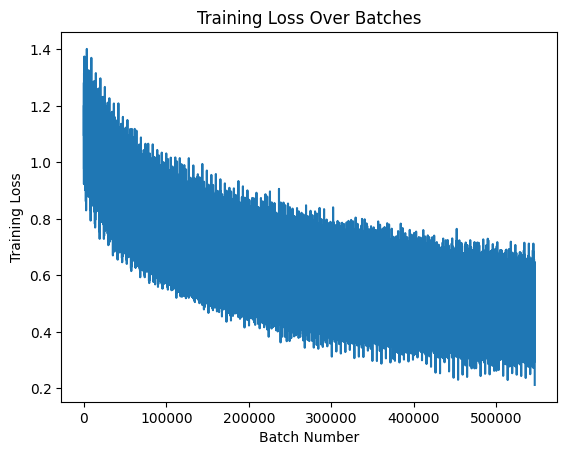

In [ ]:
plt.plot(train_losses)
plt.xlabel('Batch Number')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Batches')
plt.show()


## Inference

In [ ]:
transformer.eval()
def translate(eng_sentence):
  eng_sentence = (eng_sentence,)
  kn_sentence = ("",)
  for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, kn_sentence)
    predictions = transformer(eng_sentence,
                              kn_sentence,
                              encoder_self_attention_mask.to(device),
                              decoder_self_attention_mask.to(device),
                              decoder_cross_attention_mask.to(device),
                              enc_start_token=False,
                              enc_end_token=False,
                              dec_start_token=True,
                              dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_kannada[next_token_index]
    kn_sentence = (kn_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break
  return kn_sentence[0]

In [ ]:
translation = translate("what should we do when the day starts?")
print(translation)
#What should we do when we start?
#ದಿನ ಪ್ರಾರಂಭವಾದಾಗ ನಾವು ಏನು ಮಾಡಬೇಕು?


ನಾವು ಆರಂಭವಾಗುವಾಗ ಏನು ಮಾಡಬೇಕು?<END>


In [ ]:
translation = translate("how is this the truth?")
print(translation)
#How is this true?
#ಇದು ಹೇಗೆ ಸತ್ಯ

ಇದು ಹೇಗೆ ಸತ್ಯ?<END>


In [ ]:
translation = translate("the world is a large place with different people")
print(translation)
#The establishment of the world with the most diverse people in the world
#ಪ್ರಪಂಚವು ವಿಭಿನ್ನ ಜನರೊಂದಿಗೆ ದೊಡ್ಡ ಸ್ಥಳವಾಗಿದೆ

ವಿಶ್ವದ ದೊಡ್ಡ ವಿಭಿನ್ನ ಜನರೊಂದಿಗೆ ಜಗತ್ತಿನ ಸ್ಥಾಪನೆಯಾಗಿದೆ<END>


In [ ]:
translation = translate("my name is ajay")
print(translation)
#My name is Ajay
#ನನ್ನ ಹೆಸರು ಅಜಯ್

ನನ್ನ ಹೆಸರು ಅಜಯ್<END>


In [ ]:
translation = translate("i cannot stand this smell")
print(translation)
#I can't stand this smell
#ನಾನು ಈ ವಾಸನೆಯನ್ನು ಸಹಿಸುವುದಿಲ್ಲ

ನಾನು ಅದನ್ನು ನಿಂತುಕೊಳ್ಳಲು ಸಾಧ್ಯವಿಲ್ಲ<END>


In [ ]:
translation = translate("noodles are the best")
print(translation)
#Node best instructions

ನೋಡ್ ಅತ್ಯುತ್ತಮ ಸೂಚನೆಗಳು<END>


In [ ]:
translation = translate("why care about this?")
print(translation)
#Why is this the reason?

ಈ ಬಗ್ಗೆ ಯಾಕೆ ಕಾರಣ?<END>


In [ ]:
translation = translate("this is the best thing ever")
print(translation)
# It is also powerful

ಇದು ಶಕ್ತಿಯುತ ಸಂಗತಿಯೂ<END>


In [ ]:
translation = translate("i am here")
print(translation)
# I am right here

ನಾನು ಇಲ್ಲಿಯೇ ಇದ್ದೇನೆ<END>


In [ ]:
translation = translate("click this")
print(translation)
# ಇದನ್ನು ಕ್ಲಿಕ್ ಮಾಡಿ
#Click on it

ಇದನ್ನು ಕ್ಲಿಕ್ ಮಾಡಿ<END>


In [ ]:
translation = translate("where is the mall?")
print(translation)
#Where is the mall?

ಮಾಲ್ ಎಲ್ಲಿ ಗಾಡ?<END>


In [ ]:
translation = translate("what should we do?")
print(translation)
#What should we do?

ನಾವು ಏನು ಮಾಡಬೇಕು?<END>


In [ ]:
translation = translate("today, what should we do")
print(translation)
#Today, what should we do,

ಇಂದು, ನಾವು ಏನಾಗಬೇಕು,<END>


In [ ]:
translation = translate("why did they activate?")
print(translation)
# ಅವರು ಏಕೆ ಸಕ್ರಿಯಗೊಳಿಸಿದರು?
#Why did they become active?

ಅವರು ಏಕೆ ಕ್ರಿಯಾಶೀಲರಾದರು.<END>


In [ ]:
translation = translate("why did they do this?")
print(translation)
# ಅವರು ಇದನ್ನು ಏಕೆ ಮಾಡಿದರು?
#Why did they do this?

ಅವರು ಯಾಕೆ ಇದನ್ನು ಮಾಡಿದರು?<END>


In [ ]:
translation = translate("i am well.")
print(translation)
# ನಾನು ಆರಾಮವಾಗಿದ್ದೇನೆ
#I have come good

ನಾನು ಒಳ್ಳೆಯ ಬಂದಿದ್ದೇನೆ.<END>


In [ ]:
translation = translate("whats the word on the street?")
print(translation)
#What does street street do?

ಬೀದಿ ಬೀದಿ ಏನು ಮಾಡುತ್ತದೆ?<END>


In [ ]:
import torch
torch.save(transformer.state_dict(), 'eng2kamodel3.pth')